# 딥러닝 모델 실습 - Fashion MNIST 모델

Fashion MNIST는 이미지 분류의 대표적인 데이터셋인 MNIST 손글씨 숫자 인식과 유사하게 패션 이미지로 10개의 종류를 가지는 데이터셋이다. MNIST 손글씨 숫자 인식보다는 어려운 형태로 구성되어 있다.

## 1. 데이터 로드

Fashion MNIST 데이터셋은 케라스에 내장되어 있으며 [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist)를 임포트하고, load_data()를 호출하여 데이터셋을 로드할 수 있다.

학습용 데이터셋에서 30% 정도를 검증용 데이터셋으로 만들기 위해서 train_test_split() 함수를 이용해 분리한다.

최종적으로 딥러닝 모델에 사용할 학습, 검증, 테스트 데이터의 갯수를 출력해서 확인한다.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


<br>

Fashion MNIST 데이터셋에서 사용되는 총 10개의 클래스 이름을 class_names 변수로 지정합니다. 클래스 이름은 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 깃헙에서 확인할 수 있다.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

<br>

학습 데이터의 레이블 y_train에서 0번째가 무엇인지 출력하면 6이 출력되고, 실제 6이 어떤 클래스인지는 미리 정의한 class_names 리스트에 매칭된 이름으로 Shirt가 출력된 것을 알 수 있다.

In [ ]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


<br>

학습 데이터 x_train에서 0번째가 어떻게 구성되어 있는지 출력한다.

In [ ]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

<br>

학습 데이터는 이미지라서 0~255의 값을 가지고 있고, 이를 이미지로 imshow()를 이용해 출력합니다. 값의 범위를 보기 위해 colorbar()를 이용해 출력힌다.

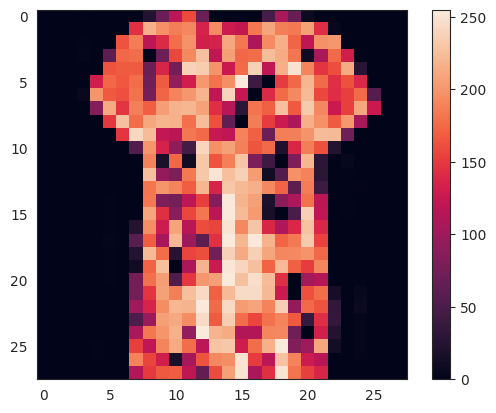

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show() # gray

<br>

Fashion MNIST 데이터셋을 확인하기 위해서 전체 학습 데이터 60,000개 중에서 랜덤으로 4개를 선택하여 인덱스와 레이블, 그리고 해당 패션 이미지를 출력한다.

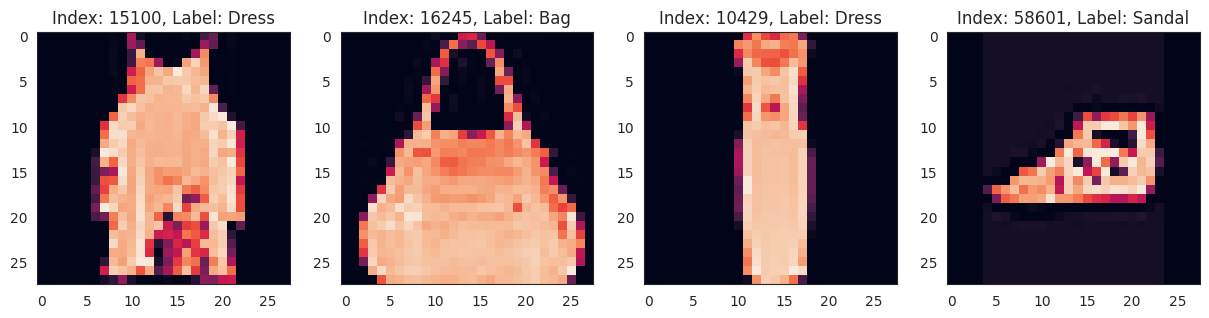

In [ ]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

<br>
<br>

## 2. 데이터 전처리

딥러닝 모델에서 효과적으로 학습시키기 위해서 입력 데이터를 적절하게 전처리 해주어야 한다. 기본적으로 데이터셋은 28 x 28 크기의 이미지가 학습 데이터 42,000개, 검증 데이터 18,000개, 테스트 데이터 10,000개로 구성되어 있다.

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


<br>

딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어준다. 여기서 reshape()을 할 때, 훈련 데이터는 (42000, 784), 검증 데이터는 (18000, 784), 테스트 데이터는 (10000, 784)로 지정해도 되지만, 28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 하였다.

In [ ]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


<br>

학습 데이터 중에서 0번째 값을 출력해보면, 0부터 255까지의 숫자로 구성되어 있기 때문에 숫자의 범위를 전처리를 통해서 줄여줄 필요가 있다.

In [ ]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

<br>

기존 데이터셋을 255.0으로 나눠주면 아주 간단하게 0 ~ 255 숫자 범위를 0 ~ 1의 범위로 줄일 수 있다.

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

<br>

다시 한번 학습 데이터 0번째 값을 출력해보면 0 ~ 1 사이의 숫자로 구성되어 있는 것을 알 수 있다.

In [ ]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

<br>
<br>

## 3. 모델 구성

Fashion MNIST 데이터셋을 패션 종류별로 분류하기 위한 딥러닝 모델을 정의하기 위해 Sequential() 함수를 사용한다. 첫번째 입력 레이어 Input 으로는 전처리에서 바꾼 모양대로 784개의 형태를 가지도록 하고, 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가한다. 그리고 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가한다.

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

<br>
<br>

## 4. 모델 컴파일 및 학습

모델에 사용할 옵티마이저는 SGD를 사용하고, 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로 sparse_categorical_crossentropy를 지정하며, 지표는 accuracy를 사용한다.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

<br>

Fashion MNIST 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고, 에폭(epochs)은 60으로 지정하며, 배치 사이즈는 512로 지정하고, 검증을 위해서는 검증 데이터로 분리시킨 x_val와 y_val를 지정하여 fit() 함수를 실행시킨다.

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2409 - loss: 2.2693 - val_accuracy: 0.5087 - val_loss: 2.0262
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5625 - loss: 1.9634 - val_accuracy: 0.5533 - val_loss: 1.8071
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6302 - loss: 1.7549 - val_accuracy: 0.6381 - val_loss: 1.6315
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6615 - loss: 1.5879 - val_accuracy: 0.6486 - val_loss: 1.4871
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6742 - loss: 1.4556 - val_accuracy: 0.6839 - val_loss: 1.3729
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6892 - loss: 1.3463 - val_accuracy: 0.6833 - val_loss: 1.2833
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6959 - loss: 1.2629 - val_accuracy: 0.6821 - val_loss: 1.2092
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7005 - loss: 1.1892 - val_accuracy: 0.6951 - val_loss

<br>

모델의 학습 과정을 저장한 history에 포함되어 있는 loss, val_loss, accuracy, val_accuracy를 차트로 시각화하는 show_history() 함수를 정의한다.

In [ ]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

<br>

정의한 show_history() 함수를 이용해 모델 학습 결과인 history를 시각화한다.

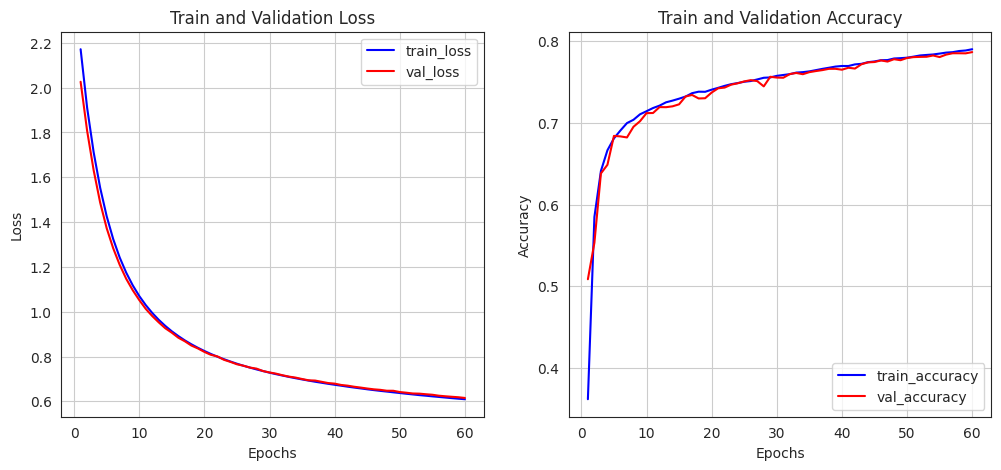

In [ ]:
show_history(history)

<br>
<br>

## 5. 모델 평가 및 예측

모델이 학습한 결과를 평가하기 위해서는 테스트 데이터셋인 x_test와 y_test를 지정하여 evaluate()를 실행시킨다. 실행 결과로는 모델이 테스트 데이터셋에서는 어느 정도의 성능이 나오는지 loss와 accuracy 값을 살펴볼 수 있다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7846 - loss: 0.6233


[0.6282868981361389, 0.7792999744415283]

<br>

학습된 모델을 이용해서 예측을 하기 위해서는 predict()를 실행시킨다. 테스트 데이터 셋인 x_test에 대해 모델의 예측 결과인 pred_ys 중에 5번째를 출력해보면, 분류 10개마다 얼만큼의 비율로 예측했는지 알 수 있다.

분류 10개의 각 값들 중에 가장 큰 값이 있는 위치를 반환하도록 argmax()를 수행한 결과를 arg_pred_y에 저장한다. 그리고 예시로 5번째를 출력해보면 결과로 1이 나오는 것을 알 수 있다. 인덱스 1에 해당하는 클래스가 무엇인지 class_names 리스트에서 가져오면 Trouser가 출력되는 것을 알 수 있다.

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.02859547e-02 9.39984739e-01 4.23960993e-03 1.47394035e-02
 1.43162990e-02 3.83079059e-05 6.23810431e-03 4.36930495e-05
 9.16762729e-05 2.22480321e-05]
1
Trouser


<br>

이미지와 모델이 예측한 결과값을 함께 출력해보면 바지 이미지와 함께 예측한 결과가 출력된 것을 알 수 있다.

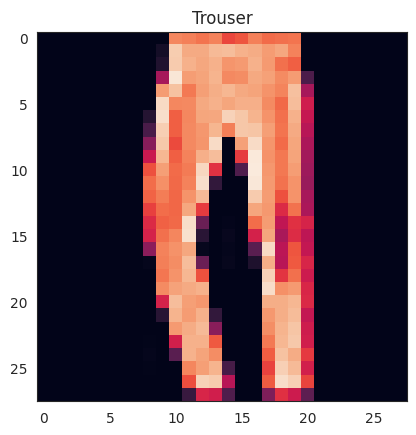

In [ ]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

<br>

이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의한다. 모델이 예측한 값인 pred_ys, 테스트 데이터셋의 정답인 y_test, 그리고 이미지 img에 대해서 i 번째를 가져와서 출력을 수행한다. 여기서 예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test가 동일하면 색으로 blue를 사용하고, 다르면 red 색을 사용하도록 지정한다. 이제 예측한 레이블의 이름, 예측한 확률값, 실제 정답 레이블의 이름을 지정한 색으로 출력한다.

In [ ]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

<br>

전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의한다. 예측한 결과 레이블인 pred_ys와 정답 레이블인 true_label에서 i 번째의 데이터에 대한 10개 클래스 값들을 바 차트로 시각화한다. 기본적으로는 색을 darkgray로 지정하고, 예측한 레이블은 red 색상으로 표시하고, 정답 레이블은 blue 색상으로 표시한다.

In [ ]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

<br>

5번째 데이터에 대해서 정의한 plot_image()와 plot_class() 함수를 호출하여 시각화한다. 결과를 보면 모델이 Trouser라고 95% 확률로 예측한 것을 알 수 있다.

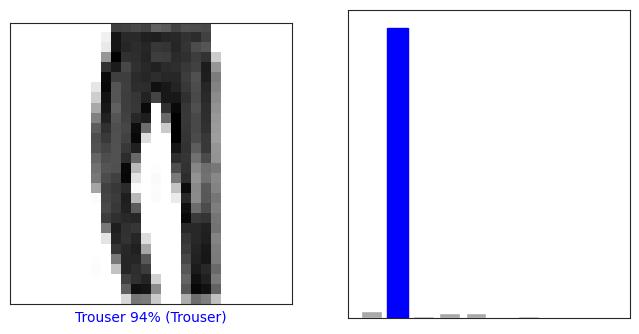

In [ ]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

<br>

10번째 데이터에 대해서도 마찬가지로 출력을 한다. 그러나 결과를 보면, 모델은 Pullover로 예측을 했지만, 실제 정답은 Coat인 것으로 알 수 있다.

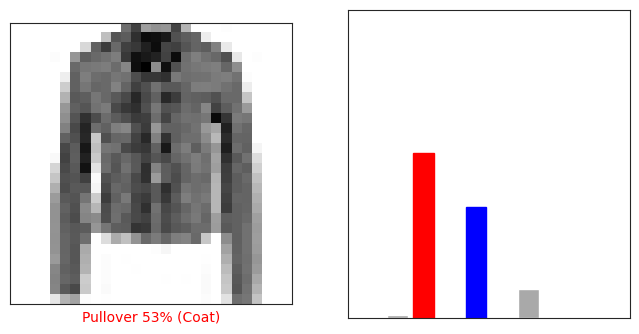

In [ ]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

<br>

이제 모델 예측 결과 여러 개를 눈으로 확인할 수 있도록 32(8x4)개를 출력하도록 한다.

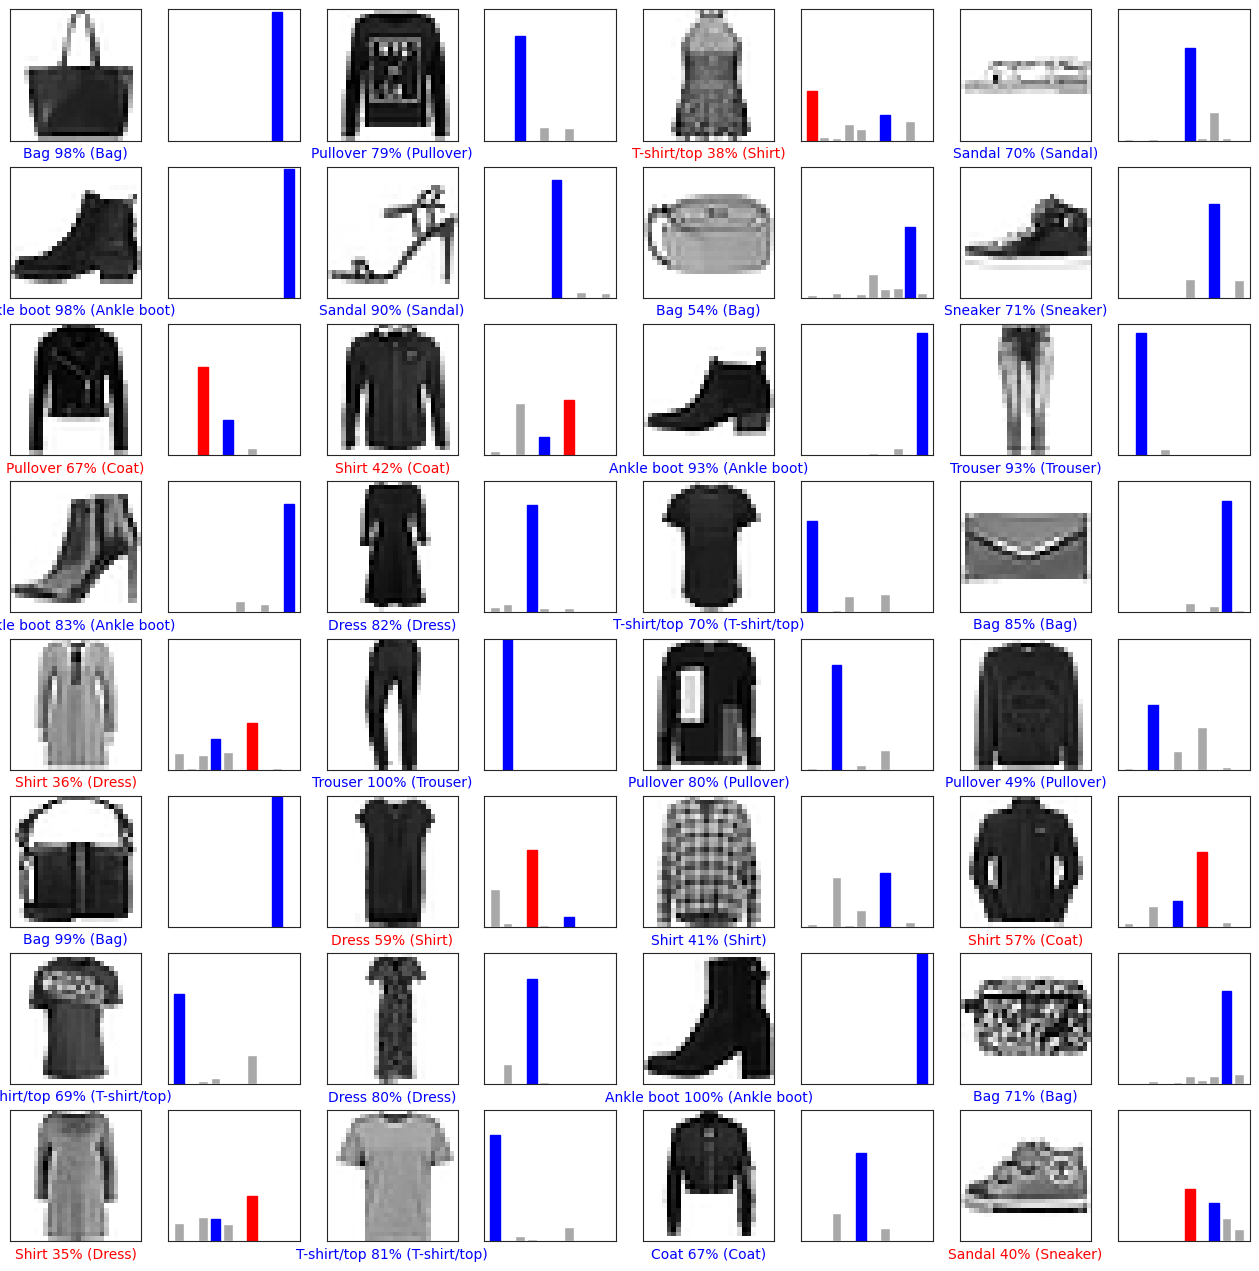

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

<br>

classification_report를 이용하여 Fashion MNIST를 분류하는 모델의 결과를 10개 분류 기준 별로 precision, recall, f1-score, support를 살펴볼 수 있다.

In [ ]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.81      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.65      0.67      0.66      1000
       Dress       0.78      0.81      0.80      1000
        Coat       0.64      0.70      0.67      1000
      Sandal       0.84      0.84      0.84      1000
       Shirt       0.52      0.37      0.43      1000
     Sneaker       0.84      0.85      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.78     10000
weighted avg       0.77      0.78      0.78     10000



<br>

confusion_matrix를 이용해서 예측한 레이블과 실제 레이블과의 일치 여부를 혼동 행렬(confusion matrix)로 시각화할 수 있다.

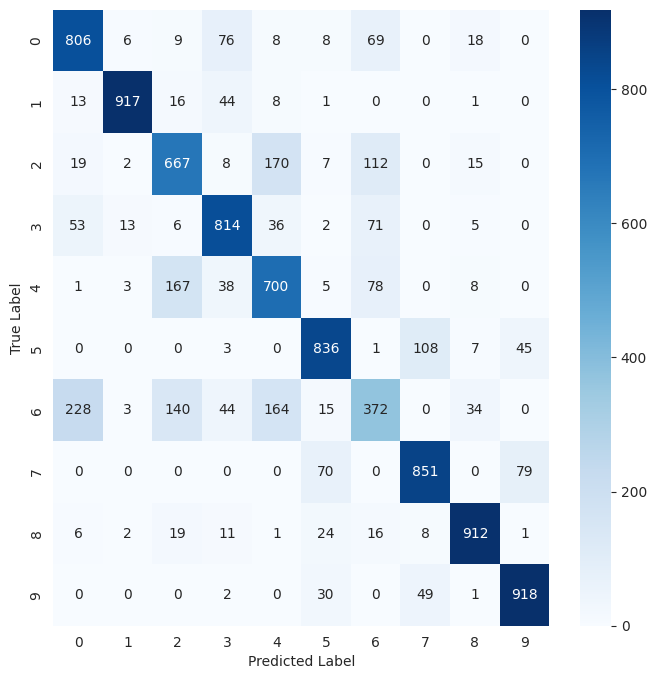

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<br>
<br>

## 6. 모델 최적화

Fashion MNIST에 모델 성능을 높일 수 있는 최적화 방법을 수행해 보자. 최적화 방법은 빠른 학습과 과대 적합을 방지할 수 있다. 각각의 최적화 방법을 적용한 모델과 적용하지 않은 모델의 결과를 비교하여 차이를 살펴보자.



### 6.1 Early Stopping

딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장되도록 콜백 함수로 ModelCheckpoint를 사용한다. 또한 val_loss 값을 10개씩 연속으로 모니터링하며 성능 변화가 없으면 조기 종료되도록 EarlyStopping을 사용한다.

정의한 콜백 함수를 사용하여 fit() 함수를 실행하여 실제 모델 학습을 진행한다.

In [ ]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.6045

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7905 - loss: 0.6045 - val_accuracy: 0.7989 - val_loss: 0.5847
Epoch 2/60
1296/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.5699

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8047 - loss: 0.5699 - val_accuracy: 0.8007 - val_loss: 0.5691
Epoch 3/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8088 - loss: 0.5463

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8088 - loss: 0.5463 - val_accuracy: 0.8107 - val_loss: 0.5469
Epoch 4/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173 - loss: 0.5239

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8173 - loss: 0.5240 - val_accuracy: 0.8145 - val_loss: 0.5333
Epoch 5/60
1292/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8190 - loss: 0.5203

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8190 - loss: 0.5202 - val_accuracy: 0.8207 - val_loss: 0.5194
Epoch 6/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.5042

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8243 - loss: 0.5042 - val_accuracy: 0.8226 - val_loss: 0.5135
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8264 - loss: 0.4962 - val_accuracy: 0.8142 - val_loss: 0.5153
Epoch 8/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.4894

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8297 - loss: 0.4894 - val_accuracy: 0.8256 - val_loss: 0.4985
Epoch 9/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.4843

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8321 - loss: 0.4843 - val_accuracy: 0.8307 - val_loss: 0.4898
Epoch 10/60
1298/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8333 - loss: 0.4781

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8334 - loss: 0.4780 - val_accuracy: 0.8324 - val_loss: 0.4824
Epoch 11/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8361 - loss: 0.4690 - val_accuracy: 0.8301 - val_loss: 0.4828
Epoch 12/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8392 - loss: 0.4541

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8392 - loss: 0.4541 - val_accuracy: 0.8360 - val_loss: 0.4744
Epoch 13/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8400 - loss: 0.4574 - val_accuracy: 0.8320 - val_loss: 0.4758
Epoch 14/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.4570

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8415 - loss: 0.4570 - val_accuracy: 0.8367 - val_loss: 0.4691
Epoch 15/60
1298/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.4563

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8413 - loss: 0.4563 - val_accuracy: 0.8387 - val_loss: 0.4657
Epoch 16/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8391 - loss: 0.4521 - val_accuracy: 0.8342 - val_loss: 0.4726
Epoch 17/60
1294/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.4430

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8447 - loss: 0.4430 - val_accuracy: 0.8384 - val_loss: 0.4614
Epoch 18/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8433 - loss: 0.4440

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8433 - loss: 0.4440 - val_accuracy: 0.8417 - val_loss: 0.4550
Epoch 19/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8436 - loss: 0.4435 - val_accuracy: 0.8406 - val_loss: 0.4575
Epoch 20/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.4407

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8436 - loss: 0.4406 - val_accuracy: 0.8443 - val_loss: 0.4505
Epoch 21/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8492 - loss: 0.4288 - val_accuracy: 0.8442 - val_loss: 0.4513
Epoch 22/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8491 - loss: 0.4311 - val_accuracy: 0.8406 - val_loss: 0.4530
Epoch 23/60
1290/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.4263

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8487 - loss: 0.4263 - val_accuracy: 0.8473 - val_loss: 0.4434
Epoch 24/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8495 - loss: 0.4290 - val_accuracy: 0.8453 - val_loss: 0.4442
Epoch 25/60
1289/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.4182

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8542 - loss: 0.4182 - val_accuracy: 0.8485 - val_loss: 0.4402
Epoch 26/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.4207

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8508 - loss: 0.4206 - val_accuracy: 0.8485 - val_loss: 0.4397
Epoch 27/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8521 - loss: 0.4203

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8521 - loss: 0.4203 - val_accuracy: 0.8505 - val_loss: 0.4390
Epoch 28/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.4164

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8537 - loss: 0.4164 - val_accuracy: 0.8484 - val_loss: 0.4368
Epoch 29/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8565 - loss: 0.4116 - val_accuracy: 0.8482 - val_loss: 0.4385
Epoch 30/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8502 - loss: 0.4174

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8502 - loss: 0.4174 - val_accuracy: 0.8499 - val_loss: 0.4339
Epoch 31/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8554 - loss: 0.4136 - val_accuracy: 0.8507 - val_loss: 0.4342
Epoch 32/60
1295/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.4025

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8584 - loss: 0.4025 - val_accuracy: 0.8497 - val_loss: 0.4315
Epoch 33/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.4041

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8570 - loss: 0.4041 - val_accuracy: 0.8507 - val_loss: 0.4303
Epoch 34/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.4061

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8544 - loss: 0.4061 - val_accuracy: 0.8521 - val_loss: 0.4291
Epoch 35/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8577 - loss: 0.4013

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8577 - loss: 0.4013 - val_accuracy: 0.8536 - val_loss: 0.4264
Epoch 36/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8535 - loss: 0.4088 - val_accuracy: 0.8514 - val_loss: 0.4287
Epoch 37/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8607 - loss: 0.4004 - val_accuracy: 0.8511 - val_loss: 0.4278
Epoch 38/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8587 - loss: 0.3942 - val_accuracy: 0.8516 - val_loss: 0.4271
Epoch 39/60
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.4012

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8569 - loss: 0.4011 - val_accuracy: 0.8539 - val_loss: 0.4234
Epoch 40/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 0.3942

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8615 - loss: 0.3942 - val_accuracy: 0.8551 - val_loss: 0.4221
Epoch 41/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3912

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8629 - loss: 0.3912 - val_accuracy: 0.8538 - val_loss: 0.4219
Epoch 42/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8613 - loss: 0.3927 - val_accuracy: 0.8510 - val_loss: 0.4295
Epoch 43/60
1297/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3946

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.3945 - val_accuracy: 0.8552 - val_loss: 0.4204
Epoch 44/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.4027

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8582 - loss: 0.4027 - val_accuracy: 0.8538 - val_loss: 0.4196
Epoch 45/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8644 - loss: 0.3856

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8644 - loss: 0.3856 - val_accuracy: 0.8560 - val_loss: 0.4168
Epoch 46/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8584 - loss: 0.3898 - val_accuracy: 0.8549 - val_loss: 0.4186
Epoch 47/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3828

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8640 - loss: 0.3828 - val_accuracy: 0.8576 - val_loss: 0.4152
Epoch 48/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3951

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8590 - loss: 0.3950 - val_accuracy: 0.8574 - val_loss: 0.4148
Epoch 49/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3890

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8594 - loss: 0.3890 - val_accuracy: 0.8578 - val_loss: 0.4130
Epoch 50/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8632 - loss: 0.3847 - val_accuracy: 0.8541 - val_loss: 0.4187
Epoch 51/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8637 - loss: 0.3811 - val_accuracy: 0.8567 - val_loss: 0.4131
Epoch 52/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3793

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8650 - loss: 0.3793 - val_accuracy: 0.8572 - val_loss: 0.4115
Epoch 53/60
1299/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3796

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8658 - loss: 0.3796 - val_accuracy: 0.8591 - val_loss: 0.4105
Epoch 54/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8678 - loss: 0.3746 - val_accuracy: 0.8568 - val_loss: 0.4112
Epoch 55/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8668 - loss: 0.3759 - val_accuracy: 0.8558 - val_loss: 0.4117
Epoch 56/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8658 - loss: 0.3779 - val_accuracy: 0.8572 - val_loss: 0.4112
Epoch 57/60
1301/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.3786

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8660 - loss: 0.3786 - val_accuracy: 0.8574 - val_loss: 0.4101
Epoch 58/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8681 - loss: 0.3747 - val_accuracy: 0.8524 - val_loss: 0.4163
Epoch 59/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.3779

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8665 - loss: 0.3779 - val_accuracy: 0.8586 - val_loss: 0.4081
Epoch 60/60
1291/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3734

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8688 - loss: 0.3734 - val_accuracy: 0.8594 - val_loss: 0.4057


<br>

모델의 학습 히스토리를 시각화한다.

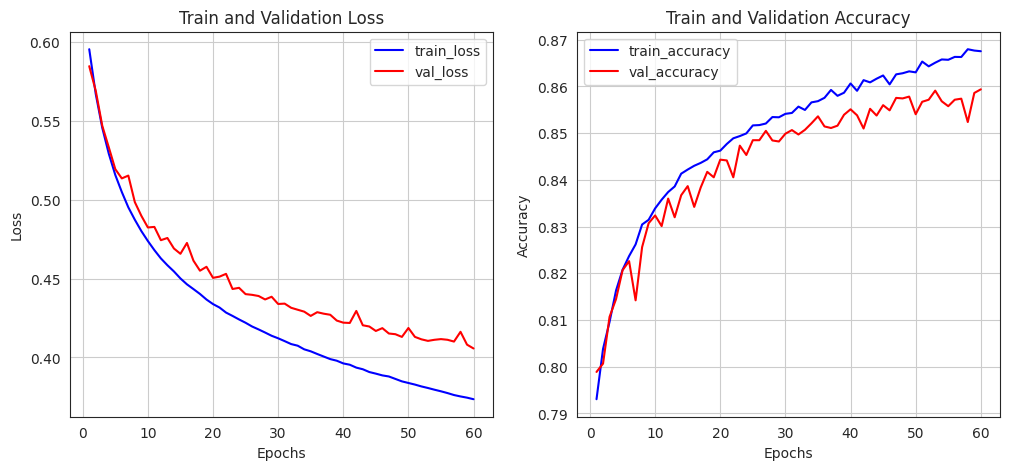

In [ ]:
show_history(history)

<br>

모델의 평가 결과도 테스트 데이터셋을 이용해 확인한다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.4221


[0.4257657825946808, 0.8463000059127808]

<br>
<br>

### 6.2 활성화 함수

기존 모델에서는 활성화 함수로 선형 함수인 sigmoid를 사용하였는데, 비선형 함수인 relu로 변경하여 학습이 어떻게 진행되는지 살펴보자.

In [ ]:
# 모델 구성: 활성화 함수 변경
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))  # sigmoid → relu
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6781 - loss: 1.0516 - val_accuracy: 0.8116 - val_loss: 0.5784
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8189 - loss: 0.5453 - val_accuracy: 0.8287 - val_loss: 0.5066
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8284 - loss: 0.4885 - val_accuracy: 0.8388 - val_loss: 0.4816
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8436 - loss: 0.4594 - val_accuracy: 0.8449 - val_loss: 0.4559
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8511 - loss: 0.4326 - val_accuracy: 0.8397 - val_loss: 0.4547
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8532 - loss: 0.4240 - val_accuracy: 0.8503 - val_loss: 0.4355
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8586 - loss: 0.4070 - val_accuracy: 0.8563 - val_loss: 0.4188
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8654 - loss: 0.3906 - 

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8739 - loss: 0.3679 - val_accuracy: 0.8656 - val_loss: 0.3958
Epoch 12/60
1298/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.3632

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8735 - loss: 0.3632 - val_accuracy: 0.8659 - val_loss: 0.3879
Epoch 13/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8750 - loss: 0.3582 - val_accuracy: 0.8576 - val_loss: 0.4104
Epoch 14/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3477

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8788 - loss: 0.3477 - val_accuracy: 0.8679 - val_loss: 0.3814
Epoch 15/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8781 - loss: 0.3506 - val_accuracy: 0.8676 - val_loss: 0.3839
Epoch 16/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8805 - loss: 0.3412

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8805 - loss: 0.3412 - val_accuracy: 0.8669 - val_loss: 0.3787
Epoch 17/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8827 - loss: 0.3352

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8827 - loss: 0.3352 - val_accuracy: 0.8713 - val_loss: 0.3703
Epoch 18/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8863 - loss: 0.3264 - val_accuracy: 0.8704 - val_loss: 0.3738
Epoch 19/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8858 - loss: 0.3241 - val_accuracy: 0.8703 - val_loss: 0.3703
Epoch 20/60
1299/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8892 - loss: 0.3161

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8892 - loss: 0.3161 - val_accuracy: 0.8752 - val_loss: 0.3615
Epoch 21/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8904 - loss: 0.3167 - val_accuracy: 0.8743 - val_loss: 0.3628
Epoch 22/60
1290/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8897 - loss: 0.3172

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8897 - loss: 0.3171 - val_accuracy: 0.8773 - val_loss: 0.3567
Epoch 23/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8891 - loss: 0.3125 - val_accuracy: 0.8618 - val_loss: 0.3869
Epoch 24/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8912 - loss: 0.3063 - val_accuracy: 0.8737 - val_loss: 0.3624
Epoch 25/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8923 - loss: 0.3050 - val_accuracy: 0.8728 - val_loss: 0.3684
Epoch 26/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8995 - loss: 0.2926 - val_accuracy: 0.8764 - val_loss: 0.3585
Epoch 27/60
1299/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8991 - loss: 0.2917

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8990 - loss: 0.2917 - val_accuracy: 0.8803 - val_loss: 0.3460
Epoch 28/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8982 - loss: 0.2906 - val_accuracy: 0.8749 - val_loss: 0.3565
Epoch 29/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8991 - loss: 0.2864 - val_accuracy: 0.8763 - val_loss: 0.3573
Epoch 30/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9000 - loss: 0.2848 - val_accuracy: 0.8771 - val_loss: 0.3487
Epoch 31/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9027 - loss: 0.2795 - val_accuracy: 0.8761 - val_loss: 0.3511
Epoch 32/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9048 - loss: 0.2727 - val_accuracy: 0.8779 - val_loss: 0.3502
Epoch 33/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9024 - loss: 0.2729

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9025 - loss: 0.2729 - val_accuracy: 0.8803 - val_loss: 0.3447
Epoch 34/60
1297/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9034 - loss: 0.2739

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9034 - loss: 0.2738 - val_accuracy: 0.8848 - val_loss: 0.3308
Epoch 35/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9046 - loss: 0.2693 - val_accuracy: 0.8803 - val_loss: 0.3395
Epoch 36/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9073 - loss: 0.2631 - val_accuracy: 0.8802 - val_loss: 0.3374
Epoch 37/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9092 - loss: 0.2620 - val_accuracy: 0.8812 - val_loss: 0.3385
Epoch 38/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9070 - loss: 0.2621 - val_accuracy: 0.8857 - val_loss: 0.3318
Epoch 39/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9107 - loss: 0.2525 - val_accuracy: 0.8668 - val_loss: 0.3663
Epoch 40/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9089 - loss: 0.2581 - val_accuracy: 0.8761 - val_loss: 0.3459
Epoch 41/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9112 - loss: 0.2538 - val_

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9133 - loss: 0.2462 - val_accuracy: 0.8869 - val_loss: 0.3264
Epoch 45/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9163 - loss: 0.2364 - val_accuracy: 0.8837 - val_loss: 0.3332
Epoch 46/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9185 - loss: 0.2376 - val_accuracy: 0.8860 - val_loss: 0.3281
Epoch 47/60
1293/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9154 - loss: 0.2362

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9154 - loss: 0.2362 - val_accuracy: 0.8890 - val_loss: 0.3197
Epoch 48/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9163 - loss: 0.2389 - val_accuracy: 0.8873 - val_loss: 0.3270
Epoch 49/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9191 - loss: 0.2356 - val_accuracy: 0.8850 - val_loss: 0.3302
Epoch 50/60
1301/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9185 - loss: 0.2315

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9185 - loss: 0.2315 - val_accuracy: 0.8902 - val_loss: 0.3180
Epoch 51/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9186 - loss: 0.2309 - val_accuracy: 0.8871 - val_loss: 0.3266
Epoch 52/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9214 - loss: 0.2261 - val_accuracy: 0.8872 - val_loss: 0.3228
Epoch 53/60
1299/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9202 - loss: 0.2280

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9203 - loss: 0.2280 - val_accuracy: 0.8908 - val_loss: 0.3167
Epoch 54/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9190 - loss: 0.2321 - val_accuracy: 0.8807 - val_loss: 0.3370
Epoch 55/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9229 - loss: 0.2194 - val_accuracy: 0.8907 - val_loss: 0.3199
Epoch 56/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9219 - loss: 0.2201 - val_accuracy: 0.8884 - val_loss: 0.3216
Epoch 57/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9257 - loss: 0.2159 - val_accuracy: 0.8876 - val_loss: 0.3221
Epoch 58/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9256 - loss: 0.2132 - val_accuracy: 0.8878 - val_loss: 0.3290
Epoch 59/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9281 - loss: 0.2076 - val_accuracy: 0.8878 - val_loss: 0.3239
Epoch 60/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9289 - loss: 0.2083

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9289 - loss: 0.2083 - val_accuracy: 0.8922 - val_loss: 0.3143


<br>

두 개의 모델 학습 히스토리를 차트로 비교할 수 있도록 시각화하는 diff_history() 함수를 정의한다.

In [ ]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

<br>

기존 모델과 활성화 함수를 relu로 변경한 모델의 학습 결과를 시각화한다.

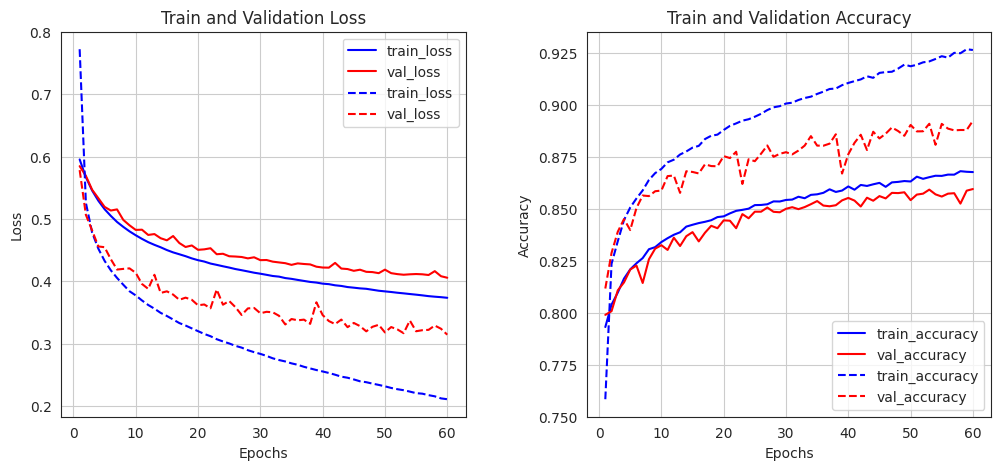

In [ ]:
diff_history(history, history2)

<br>

활성화 함수를 변경한 모델의 평가 결과를 확인한다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8792 - loss: 0.3393


[0.3406347632408142, 0.8784999847412109]

<br>
<br>

### 6.3 옵티마이저

기존 모델에서는 옵티마이저로 SGD를 사용했는데, 좀 더 빠르고 효과적인 학습이 가능하도록 Adam으로 변경한다.

In [ ]:
# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))  # 기본 모델
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일: 옵티마이저 변경
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',  # SGD → Adam
              metrics=['accuracy'])

In [ ]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7628 - loss: 0.6879 - val_accuracy: 0.8479 - val_loss: 0.4263
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8498 - loss: 0.4105 - val_accuracy: 0.8588 - val_loss: 0.3936
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8651 - loss: 0.3701 - val_accuracy: 0.8667 - val_loss: 0.3731
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8780 - loss: 0.3303 - val_accuracy: 0.8709 - val_loss: 0.3571
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8862 - loss: 0.3085 - val_accuracy: 0.8670 - val_loss: 0.3707
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8902 - loss: 0.2954 - val_accuracy: 0.8823 - val_loss: 0.3293
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8981 - loss: 0.2717 - val_accuracy: 0.8807 - val_loss: 0.3330
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9015 - loss: 0.2662 - 

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9057 - loss: 0.2481 - val_accuracy: 0.8931 - val_loss: 0.3077
Epoch 10/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9105 - loss: 0.2365 - val_accuracy: 0.8858 - val_loss: 0.3207
Epoch 11/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9167 - loss: 0.2207 - val_accuracy: 0.8852 - val_loss: 0.3221
Epoch 12/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9213 - loss: 0.2145 - val_accuracy: 0.8827 - val_loss: 0.3294
Epoch 13/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9229 - loss: 0.2049 - val_accuracy: 0.8817 - val_loss: 0.3348
Epoch 14/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9273 - loss: 0.1961 - val_accuracy: 0.8754 - val_loss: 0.3687
Epoch 15/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9274 - loss: 0.1886 - val_accuracy: 0.8928 - val_loss: 0.3225
Epoch 16/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9326 - loss: 0.1782 - val_

<br>

기존 모델 학습 결과와 옵티마이저를 바꾼 모델의 학습 결과를 살펴보면, 학습이 빠르게 진행되어 조기에 종료되는 것을 알 수 있다. 다만, 과대적합이 발생하는 것을 알 수 있다.

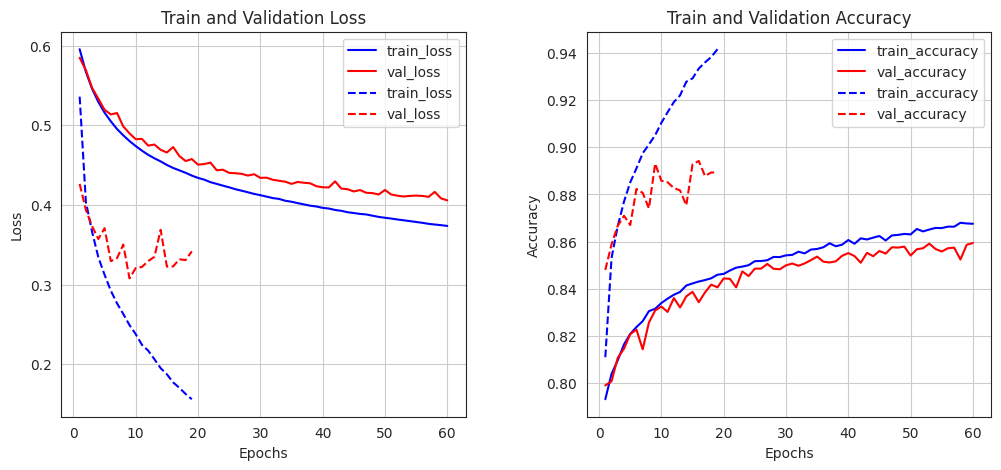

In [ ]:
diff_history(history, history3)

<br>

옵티마이저를 변경한 모델의 평가 결과를 확인한다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8799 - loss: 0.3319


[0.3348725438117981, 0.880299985408783]

<br>
<br>

### 6.4 규제

모델에서 과대적합이 발생하는 부분을 규제하기 위해서 중간의 Dense 레이어에 L2 규제 방법을 적용한다.

In [ ]:
import tensorflow.keras.regularizers as regularizers

# 모델 정의: Dense에 L2 규제 적용
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512,
                       activation='sigmoid',
                       kernel_regularizer=regularizers.l2(0.001)))  # L2 규제 적용
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5408 - loss: 2.2602 - val_accuracy: 0.7281 - val_loss: 1.4910
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7441 - loss: 1.4250 - val_accuracy: 0.7551 - val_loss: 1.3001
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7634 - loss: 1.2678 - val_accuracy: 0.7757 - val_loss: 1.2072
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7797 - loss: 1.1900 - val_accuracy: 0.7876 - val_loss: 1.1467
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7904 - loss: 1.1330 - val_accuracy: 0.7956 - val_loss: 1.0956
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7993 - loss: 1.0781 - val_accuracy: 0.8043 - val_loss: 1.0523
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8057 - loss: 1.0412 - val_accuracy: 0.8108 - val_loss: 1.0157
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8152 - loss: 0.9957 -

<br>

기존 모델 학습 결과와 L2 규제 방법을 적용한 모델의 학습 결과를 살펴보면, 성능은 일부 저하되지만 어느정도 과대적합을 억제하는 것을 알 수 있다.

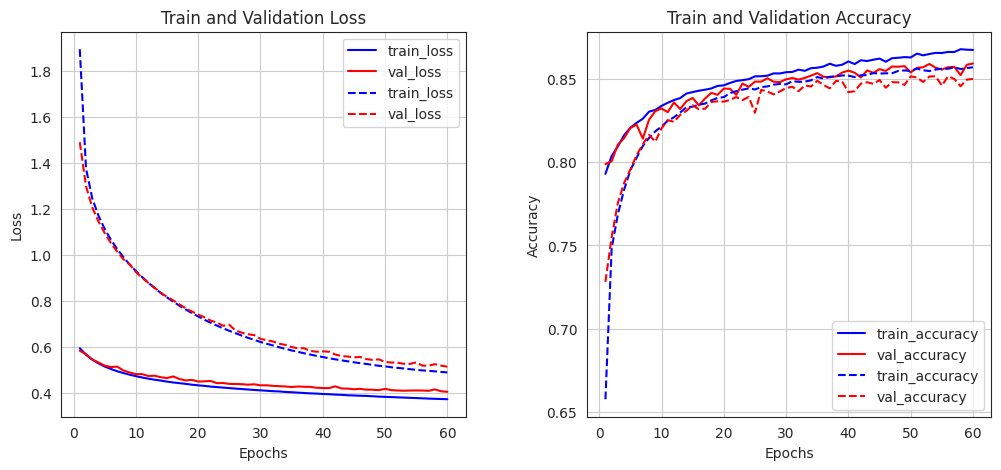

In [ ]:
diff_history(history, history4)

<br>

L2 규제 방법을 적용한 모델의 평가 결과를 확인한다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - loss: 0.5291


[0.5338103175163269, 0.8360999822616577]

<br>
<br>

### 6.6 드롭아웃

모델에서 성능 저하를 최소화하면서 과대적합을 억제하기 위한 방법으로 Dense 레이어 사이에 50%의 Dropout 레이어를 적용한다.

In [ ]:
# 모델 정의: Dropout(0.5) 추가
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))  # Dropout 추가
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3462 - loss: 1.8525 - val_accuracy: 0.7209 - val_loss: 0.9280
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6467 - loss: 0.9981 - val_accuracy: 0.7454 - val_loss: 0.7580
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6914 - loss: 0.8483 - val_accuracy: 0.7510 - val_loss: 0.6984
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7175 - loss: 0.7742 - val_accuracy: 0.7666 - val_loss: 0.6534
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7339 - loss: 0.7286 - val_accuracy: 0.7718 - val_loss: 0.6292
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7392 - loss: 0.7077 - val_accuracy: 0.7811 - val_loss: 0.6076
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7507 - loss: 0.6716 - val_accuracy: 0.7832 - val_loss: 0.5927
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7585 - loss: 0.6548 - 

<br>

기존 모델 학습 결과와 드롭아웃을 적용한 방법의 학습 결과를 살펴보면, 과대적합을 잘 방지하고 있는 결과를 보여주고 있다.

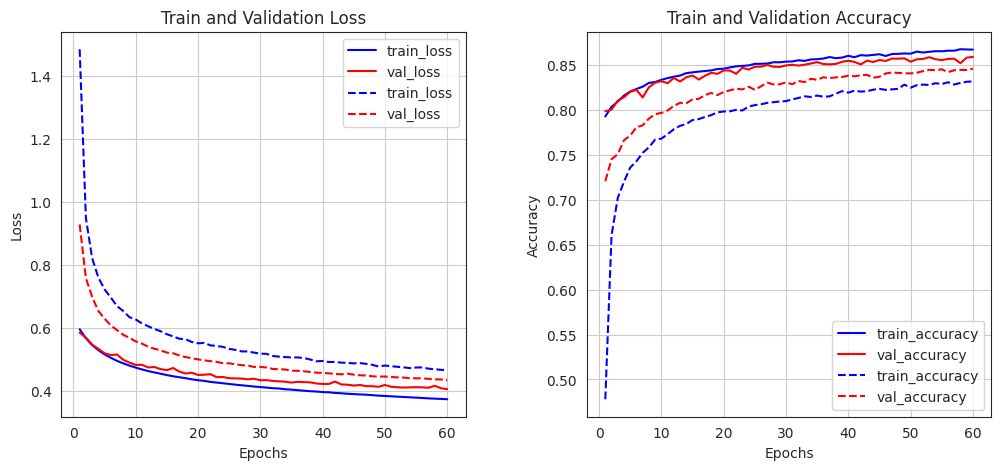

In [ ]:
diff_history(history, history5)

<br>

규제 방법 중에 L2 규제보다는 드롭아웃 방법이 더 좋은 결과를 보여주는 것을 알 수 있다.

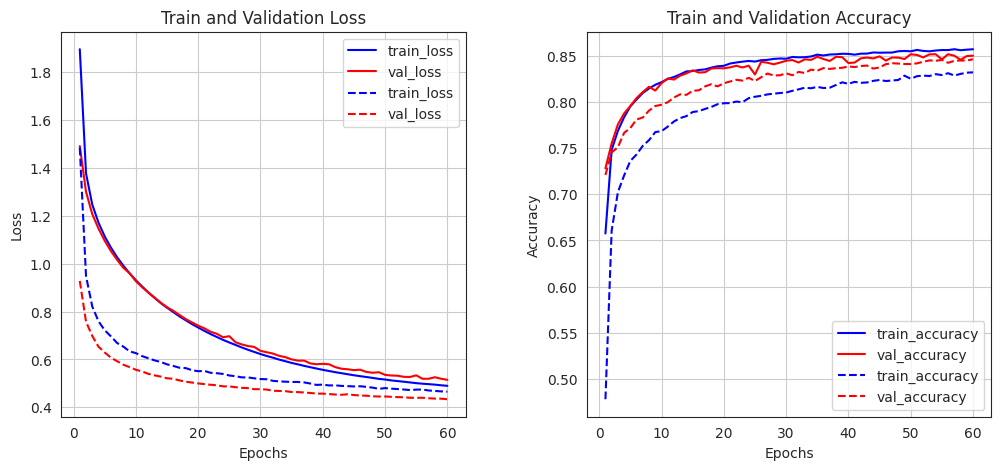

In [ ]:
diff_history(history4, history5)

<br>

드롭아웃 방법을 적용한 모델의 평가 결과를 확인한다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8372 - loss: 0.4510


[0.4559369683265686, 0.832099974155426]

<br>
<br>

### 6.7 배치 정규화

빠르고 효과적인 학습을 도와주는 배치 정규화도 적용해보기 위해 Dense 레이어 다음에 BatchNormalization 레이어를 추가하고, 이후 활성화 함수 Activation 레이어를 추가한다.

In [ ]:
# 모델 구성: Dense → BatchNormalization → Activation 구조
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())            # 배치 정규화
model.add(layers.Activation('sigmoid'))           # 활성화 함수 분리
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6725 - loss: 1.0984 - val_accuracy: 0.7967 - val_loss: 0.6057
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8044 - loss: 0.5894 - val_accuracy: 0.8209 - val_loss: 0.5284
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8189 - loss: 0.5292 - val_accuracy: 0.8326 - val_loss: 0.4945
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8316 - loss: 0.4940 - val_accuracy: 0.8392 - val_loss: 0.4763
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8337 - loss: 0.4814 - val_accuracy: 0.8382 - val_loss: 0.4664
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8399 - loss: 0.4585 - val_accuracy: 0.8427 - val_loss: 0.4614
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8438 - loss: 0.4512 - val_accuracy: 0.8429 - val_loss: 0.4551
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8454 - loss: 0.4456 - 

<br>

기존 모델 결과와 배치 정규화를 적용한 모델의 학습 결과를 살펴보면, 학습도 빠르게 진행되는 결과를 보여주고 있다.

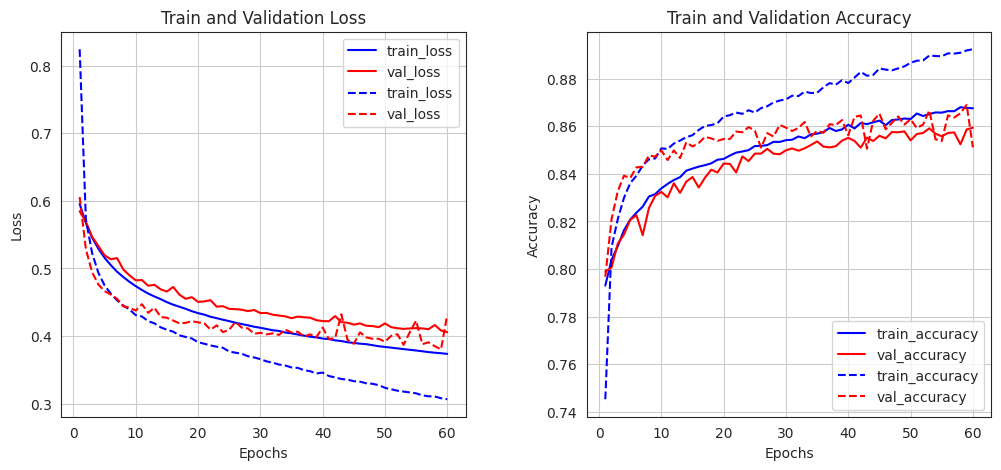

In [ ]:
diff_history(history, history6)

<br>

배치 정규화 방법을 적용한 모델의 평가 결과를 확인한다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8573 - loss: 0.3972


[0.4013194143772125, 0.8564000129699707]

<br>
<br>

### 6.8 배치  정규화 + 드롭아웃

배치 정규화를 통해 안정적인 학습이 가능하지만, 규제 방법 중 좋은 성능을 보였던 드롭아웃을 함께 적용해보도록 한다. 기존 배치 정규화를 적용한 모델에 Activation 레이어 이후에 Dropout 레이어를 추가한다.

In [ ]:
# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())   # 배치 정규화
model.add(layers.Activation('sigmoid'))  # 활성화 함수
model.add(layers.Dropout(0.5))           # 드롭아웃(0.5)
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5522 - loss: 1.2900 - val_accuracy: 0.7819 - val_loss: 0.6257
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7447 - loss: 0.7331 - val_accuracy: 0.8117 - val_loss: 0.5465
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7709 - loss: 0.6527 - val_accuracy: 0.8205 - val_loss: 0.5164
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7857 - loss: 0.6113 - val_accuracy: 0.8226 - val_loss: 0.5034
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7891 - loss: 0.5985 - val_accuracy: 0.8354 - val_loss: 0.4812
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7997 - loss: 0.5697 - val_accuracy: 0.8335 - val_loss: 0.4759
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8051 - loss: 0.5589 - val_accuracy: 0.8328 - val_loss: 0.4765
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8041 - loss: 0.5492 - 

<br>

배치 정규화와 드롭아웃을 둘다 적용하였기 때문에 안정적인 학습과 더불어 과대적합도 줄여주는 결과를 볼 수 있다.

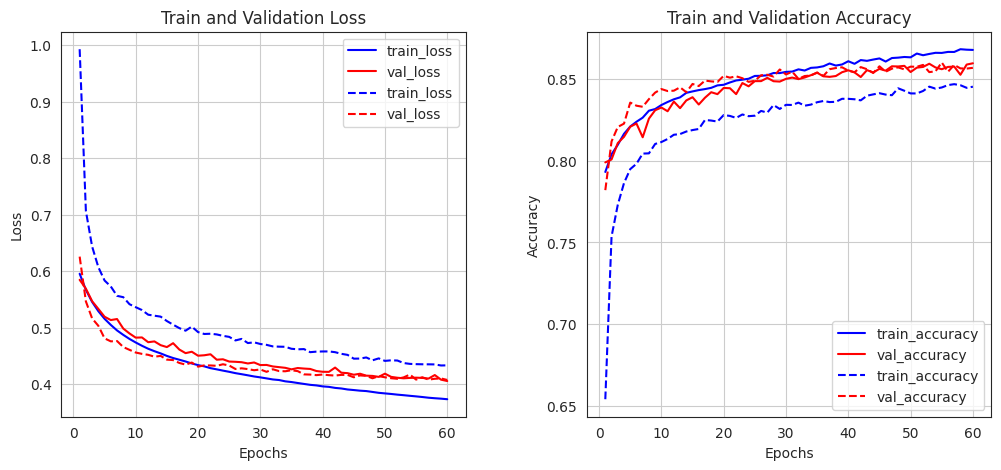

In [ ]:
diff_history(history, history7)

<br>

배치 정규화와 드롭아웃을 둘 다 적용한 모델의 평가 결과를 확인한다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8483 - loss: 0.4211


[0.42607608437538147, 0.8465999960899353]

<br>
<br>

## 7. 모델 결과 분석

모델의 예측 결과 시각화
- 랜덤으로 데이터를 선별하여 최종적으로 최적화를 수행한 모델이 분류한 결과를 시각화한다.

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


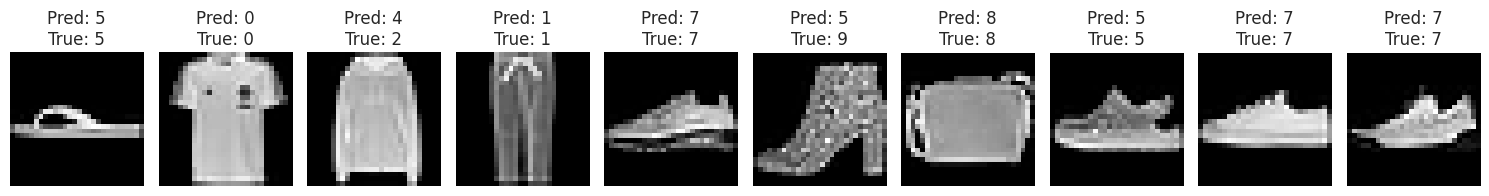

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 예측 수행
pred_probs = model.predict(x_val)
pred_labels = np.argmax(pred_probs, axis=1)

# 실제 라벨
true_labels = y_val

# 무작위로 10개 샘플 시각화
num_samples = 10
random_idxs = np.random.choice(len(x_val), size=num_samples, replace=False)

plt.figure(figsize=(15, 4))
for i, idx in enumerate(random_idxs):
    image = x_val[idx].reshape(28, 28)  # 이미지 reshape
    pred = pred_labels[idx]
    true = true_labels[idx]

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Pred: {pred}\nTrue: {true}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<br>

최적화한 모델의 분류 결과를 클래스별로 성능 지표 확인

In [ ]:
from sklearn.metrics import classification_report

# 성능 보고서 출력
print('Classification Report:\n')
print(classification_report(true_labels, pred_labels))

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1813
           1       0.99      0.96      0.97      1746
           2       0.78      0.75      0.77      1801
           3       0.85      0.88      0.87      1794
           4       0.78      0.78      0.78      1808
           5       0.94      0.92      0.93      1819
           6       0.62      0.64      0.63      1774
           7       0.90      0.94      0.92      1804
           8       0.95      0.95      0.95      1794
           9       0.96      0.94      0.95      1847

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



<br>

모델 결과 혼동 행렬 시각화

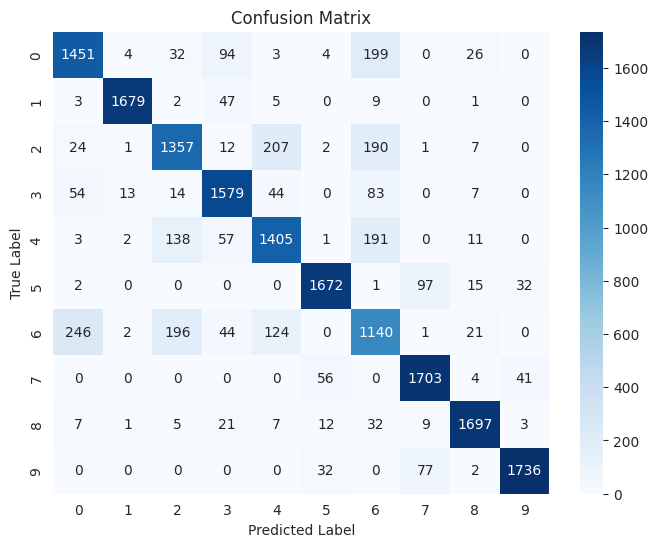

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 혼동 행렬 계산
conf_matrix = confusion_matrix(true_labels, pred_labels)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<br>

Fashion MNIST를 분류하는 딥러닝 모델이 최적화를 통해서 기본 모델 보다 상당히 높은 성능을 보여주는 것을 알 수 있다. 그러나 최적화를 수행하여도 모델 평가 결과는 90%를 넘기기 어렵다.

딥러닝 모델에서 구조적으로 이미지를 입력으로 사용할 때 적합한 CNN(Convolution Neural Network) 계열의 아키텍처가 있고, 텍스트를 입력으로 사용할 때 적합한 RNN(Recurrent Neural Network) 계열의 아키텍처가 있다. 즉, 기본적인 신경망 구조가 아닌 입력되는 데이터의 특성을 고려한 아키텍처가 필요하다.



<br>
<br>

## 추가 실험

### 6.9 배치 정규화 + 드롭아웃 + Adam

In [ ]:
# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())   # 배치 정규화
model.add(layers.Activation('sigmoid'))  # 활성화 함수
model.add(layers.Dropout(0.5))           # 드롭아웃(0.5)
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history8 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7386 - loss: 0.7648 - val_accuracy: 0.8414 - val_loss: 0.4600
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8157 - loss: 0.5256 - val_accuracy: 0.8363 - val_loss: 0.4544
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8220 - loss: 0.4966 - val_accuracy: 0.8347 - val_loss: 0.4556
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8327 - loss: 0.4676 - val_accuracy: 0.8494 - val_loss: 0.4181
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8381 - loss: 0.4471 - val_accuracy: 0.8539 - val_loss: 0.4085
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8491 - loss: 0.4194 - val_accuracy: 0.8571 - val_loss: 0.4013
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8490 - loss: 0.4141 - val_accuracy: 0.8568 - val_loss: 0.3978
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8527 - loss: 0.3991 

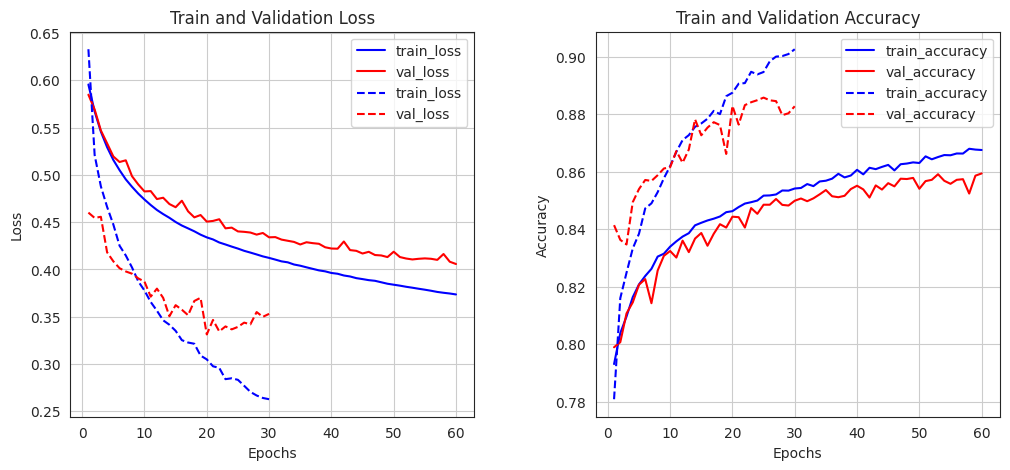

In [ ]:
diff_history(history, history8)

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8781 - loss: 0.3486


[0.35438740253448486, 0.8773999810218811]

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


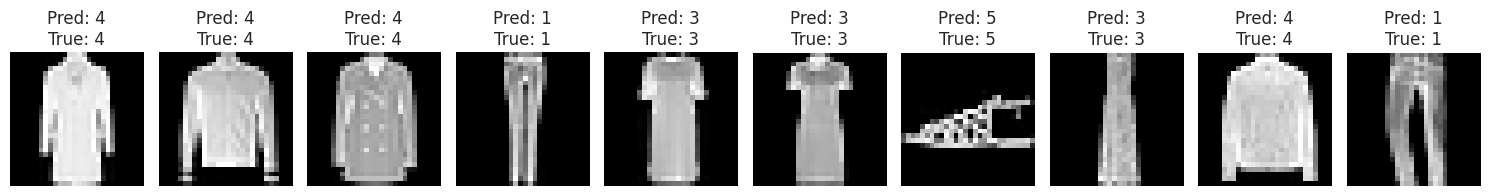

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 예측 수행
pred_probs = model.predict(x_val)
pred_labels = np.argmax(pred_probs, axis=1)

# 실제 라벨
true_labels = y_val

# 무작위로 10개 샘플 시각화
num_samples = 10
random_idxs = np.random.choice(len(x_val), size=num_samples, replace=False)

plt.figure(figsize=(15, 4))
for i, idx in enumerate(random_idxs):
    image = x_val[idx].reshape(28, 28)  # 이미지 reshape
    pred = pred_labels[idx]
    true = true_labels[idx]

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Pred: {pred}\nTrue: {true}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# 성능 보고서 출력
print('Classification Report:\n')
print(classification_report(true_labels, pred_labels))

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1813
           1       0.99      0.98      0.98      1746
           2       0.78      0.83      0.80      1801
           3       0.88      0.90      0.89      1794
           4       0.81      0.82      0.82      1808
           5       0.94      0.97      0.95      1819
           6       0.74      0.66      0.69      1774
           7       0.96      0.90      0.93      1804
           8       0.96      0.96      0.96      1794
           9       0.94      0.97      0.95      1847

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



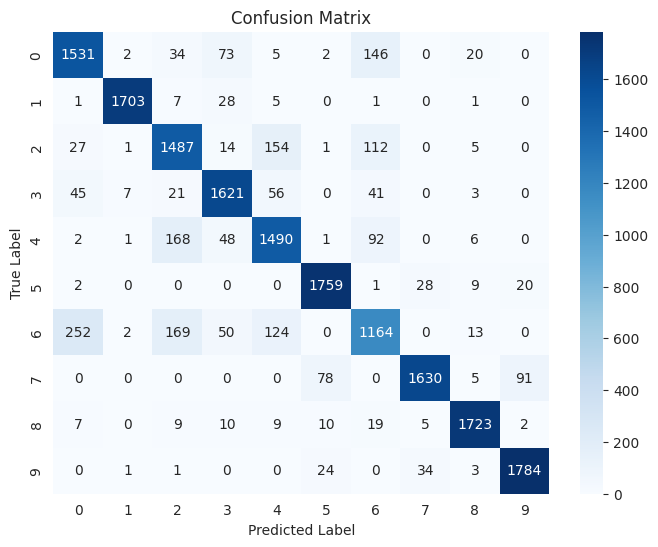

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 혼동 행렬 계산
conf_matrix = confusion_matrix(true_labels, pred_labels)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()